# Teoria da Semana 6

### Professor: Kazuki Yokoyama | Tema: Redução de Dimensionalidade e Seleção de Variáveis

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

**Redução de Dimensionalidade:** Redução de dimensões por **transformação** das variáveis originais do *dataset*, trazendo os dados para um espaço de dimensões menores.

**Seleção de Variáveis:** Redução de dimensões **retirando** as variáveis que acrescentam pouco valor para a tarefa de predição, como uma espécie de filtro

### Redução de Dimensionalidade

Cada problema apresenta um número de dimensões, uns mais e outros menos. A questão é: será que existe redundância? Ou seja, um problema com 50 dimensões precisa **realmente** de todas as 50 dimensões? Será que algumas dessas não trazem imformações iguais, mas encaradas por ângulos diferentes apenas?

**Muitas dimensões**

- Tudo que vemos são 3 dimensões apenas, e quando encaramos algo com mais, temos que, no máximo, olhar essas dimensões de 3 em 3. Mas nesse processo, perdemos informação

- As distâncias entre pontos em espaços em de alta dimensionalidade também é um entrave. Eles concentram-se muito nas bordas, mas ficam muito espaçados nos centros. Portanto, qualquer algoritmo que use de distâncias Euclidianas vai sofrer com as distorções em hiperespaços

- Diante desse problema de densidade, podemos pensar em *preencher* esses vazios com mais informação (dados) sobre o problema, mas pode ser dificil conseguir essas informações *à mais*. Então, resta diminuir as dimensões do problema mesmo.

**PCA (Principle Component Analisys)**

Como técnica de redução de dimensões, vamos aprender o PCA. Sua idéia é criar vetores, conhecidos como **Componentes Principais**, que apresentam o **máximo de variância e o mínimo de resíduo** dos dados originais. Se o *dataset* apresenda $n$ dimensões, existirão até $n$ componentes principais.

![imagem](http://alexhwilliams.info/itsneuronalblog/img/pca/pca_two_views.png)

Antes de diminuir dimensões usando PCA, vamos visualizá-los

In [2]:
rnd = np.random.RandomState(1)

In [3]:
a = rnd.rand(2,2)  # matriz 2,2 com valores aleatórios ]0, 1[

In [4]:
b = rnd.randn(2, 200)  # matriz 2,200 com valores aletórios inteiros

Vamos criar uma matriz de 2 variáveis e 200 tuplas

In [5]:
x = np.dot(a, b).T  # matriz transposta 2,200 do produto das matrizes a e b

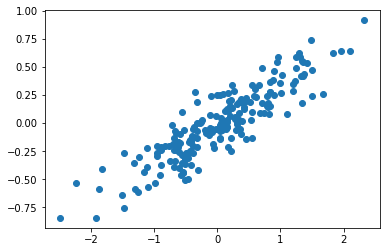

In [6]:
plt.scatter(x[:, 0], x[:, 1])
plt.show()

Temos essa visualização em 2D dos nossos dados de 2 dimensões (duas colunas). Agora vamos encontrar os vetores **componentes principais** que conseguem descreve-los

In [11]:
pca = skl.decomposition.PCA(n_components=2)

aqui, n_components significa que eu quero **DUAS** componentes principais. Como meu *dataset* possui duas colunas, eu consigo gerar até 2 componentes principais

In [12]:
pca.fit(x)

PCA(n_components=2)

In [13]:
compomentes = pca.components_

In [14]:
var_exp = pca.explained_variance_

In [15]:
def vetor(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

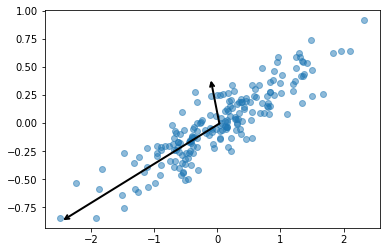

In [17]:
plt.scatter(x[:, 0], x[:, 1], alpha=0.5)
for length, vector in zip(var_exp, compomentes):
    v = vector * 3 * np.sqrt(length)
    vetor(pca.mean_, pca.mean_ + v)

**Interpretando:** esses vetores representam os eixos principais da distribuição que minimizam resíduo e maximizam a variancia dos dados, e o módulo desses vetores a importância na descrição dos dados. Mais precisamente, são as medidas de variância dos dados quando projetados nos compomentes principais

**PCA para Redução de Dimensões**

Vamos duminuir a dimensão do nosso conjunto x. Como ele possui apenas 2 dimensões, poderemos visualizar bem o que ocorre

In [23]:
pca_reduzido = skl.decomposition.PCA(n_components=1)

In [32]:
x_reduzido = pca_reduzido.transform(x)

In [39]:
x_reduzido.shape

(200, 1)

In [34]:
pca_reduzido.components_

array([[-0.94446029, -0.32862557]])

In [35]:
pca_reduzido.explained_variance_

array([0.7625315])

Como temos apenas UMA dimensão, não será possível visualizar dessa maneira, teremos que transformar novamente o conjunto

In [121]:
x_reduzido_inverso = pca_reduzido.inverse_transform(x_reduzido)

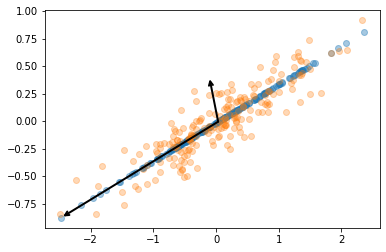

In [126]:
plt.scatter(x_reduzido_inverso[:, 0], x_reduzido_inverso[:, 1], alpha=.4)
plt.scatter(x[:, 0], x[:, 1], alpha=0.3)
for length, vector in zip(var_exp, compomentes):
    v = vector * 3 * np.sqrt(length)
    vetor(pca.mean_, pca.mean_ + v)

In [123]:
x_reduzido_inverso.shape

(200, 2)

**Interpretando:** Os pontos mais escuros representam um conjunto com a mesma dimensão do *dataset* original, a diferença é que eles foram criados de modo a representar somente a projeção dos pontos de maior variância e menor resíduo. Perceba que a segunda componente principal foi suprimida, uma vez que os pontos escuros estão todos na mesma direçao da primeira componente principal

Vamos analisar um set de maior dimensionalidade

In [26]:
from sklearn.datasets import load_digits

digitos = load_digits()

In [19]:
digitos.data.shape  # é um dataset multidimensional

(1797, 64)

In [20]:
pca_dois = skl.decomposition.PCA(n_components=2)

In [21]:
reduzido = pca_dois.fit_transform(digitos.data)

In [22]:
print(f'set original: {digitos.data.shape}\nset reduzido: {reduzido.shape}')

set original: (1797, 64)
set reduzido: (1797, 2)


Temos agora um *dataset* reduzido a apenas duas dimensões, sendo que o PCA tentou preservar nessas duas dimensões, o máximo da "qualidade" de informação que existia no conjunto de 64 dimensões

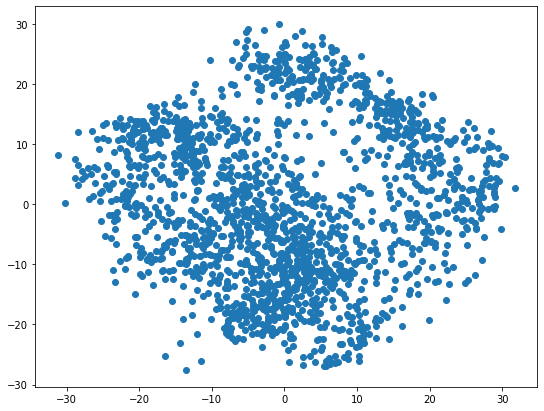

In [51]:
plt.figure(figsize=(9, 7))
plt.scatter(reduzido[:, 0], reduzido[:, 1])
plt.show()

Agora, e se quisessemos preservar tantos por cento de qualidade dos dados? O que temos feito é escolher, deliberadamente, quantas dimensões gostaríamos que o PCA reduzisse nosso conjunto de dados. Mas podemos fazer com que o PCA nos diga qual a melhor quantidade de variáveis

Para percebermos isso, basta enxergar quantos por cento uma determinada componente principal explica do conjunto original

In [53]:
pca.explained_variance_ratio_

array([0.97634101, 0.02365899])

no primeiro set, aquele com o vetor desenhado, temos que uma compomente explica ~98% da máxima variância, e o outro explica ~2%

para o set de 64 dimensões, reduzido à duas, também podemos ver quanto as 2 compomentes principais explicam

In [54]:
pca_dois.explained_variance_ratio_

array([0.14890594, 0.13618771])

Vemos que uma componente explica 15,9% e outra 13,6%

In [55]:
pca_64 = skl.decomposition.PCA()

In [56]:
pca_64.fit(digitos.data)

PCA()

In [69]:
var_exp_64 = pca_64.explained_variance_ratio_

In [65]:
malha = np.arange(var_exp_64.size)  # malha espaçada de 1 unidade para representar as dimensões

In [73]:
cumulativa = np.cumsum(var_exp_64)

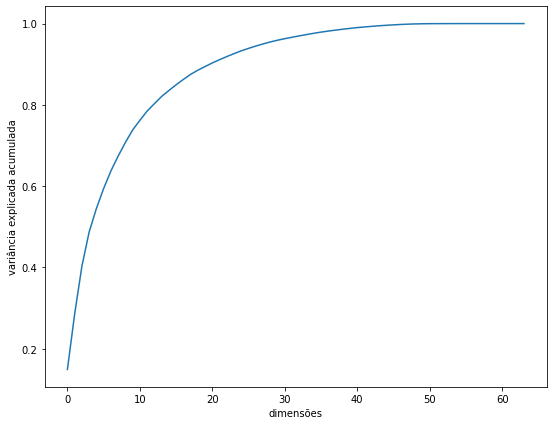

In [80]:
plt.figure(figsize=(9, 7))
plt.plot(malha, cumulativa)
plt.xlabel('dimensões')
plt.ylabel('variância explicada acumulada')
plt.show()

É perfeitamente possível ver quanto se explica do *dataset* à medida que se aumentam o número de dimensões. Também é possível enxergar que existem variáveis que "explicam mais" que outras, só não sabemos quais ainda. Isso demonstra a existência de redundâncias, tem dimensões que com todo o seu conjunto de dados, contribuem muito pouco no entendimento do todo

Podemos, então, atribuir uma quantidade apreciável de dimensões que expliquem o todo, sem necessariamente usar todas as dimensões

Se, por um acaso, eu queira saber quantas dimensões eu preciso para explicar 95% do meu conjunto

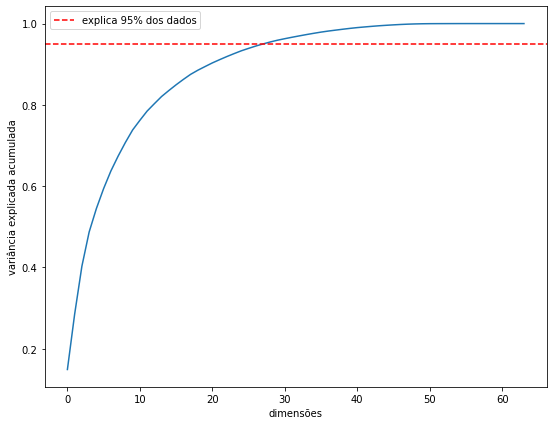

In [91]:
plt.figure(figsize=(9, 7))
plt.plot(malha, cumulativa)
plt.axhline(.95, ls='--', color='red', label='explica 95% dos dados')
plt.xlabel('dimensões')
plt.ylabel('variância explicada acumulada')
plt.legend(loc='best')
plt.show()

De acordo com o gráfico, precisamos de 20 a 30 dimensões para explicar 95% do conjunto

In [111]:
n_dim = np.argmax(cumulativa[cumulativa <= .95]) + 1
n_dim

28

Podemos fazer com o que PCA nos diga qual a quantidade de dimensões exatas

In [92]:
pca_64_dois = skl.decomposition.PCA(n_components=.95)

In [93]:
pca_64_dois.fit(digitos.data)

PCA(n_components=0.95)

In [107]:
pca_64_dois.explained_variance_.shape[0]

29

**O que são essas tais "componentes"**

Vamos recobrar o conceito de **vetores de base**, que são vetores capazes de gerar um campo vetorial e são Linearmente Independentes entre si, como no espaço vetorial $\mathbb{R^3}$, onde $\hat{i} = (1, 0, 0), \hat{j} = (0, 1, 0), \hat{k} = (0, 0, 1)$ é a sua **base canônica**

Diante disso, para construir qualquer vetor nesse espaço vetorial, basta fazer uma **combinação linear** dos vetores de base do $\mathbb{R^3}$

$$\vec{a}=\alpha \hat{i}+\beta \hat{j}+\gamma \hat{k}$$

e as letras gregas $\alpha, \beta, \gamma$ são os tais **componentes**, sendo esses usados para gerar os vetores **componentes principais**

No caso de sistemas hiperdimensionais, existirão vários desses, como já constatamos nos exemplos acima

Para exemplificar, podemos entender a álgebra de geração de imagens, a idéia é a mesma:

$$imagem(x)=(pixel_1).\hat{x}_1+(pixel_2).\hat{x}_2+(pixel_3).\hat{x}_3+\dots+(pixel_n).\hat{x}_n$$

Como vimos nos exemplos acima, não precisamos de **TODAS** as dimensões para caracterizar uma imagem. Ou seja, podemos encontrar uma quantidade mínima suficiente para diferenciar uma da outra. Assim, teremos um vetor de imagem otimizado